In [1]:
# your basic imports
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
import scipy.ndimage as nd
import glob
pl.rcParams['font.size'] = 20

%pylab inline



Populating the interactive namespace from numpy and matplotlib


# Find top of ESB

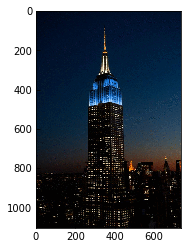

In [2]:
pl.imshow(nd.imread("esb/Empire-State-Building-Farben-1 (dragged).tiff"))

extract the top of ESB

In [3]:
esbtop = nd.imread("esb/Empire-State-Building-Farben-1 (dragged).tiff")[50:490, 260:440]

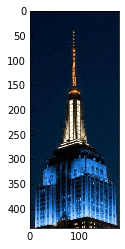

In [4]:
pl.imshow(esbtop)

In [5]:
esbBWtop = esbtop.mean(-1)

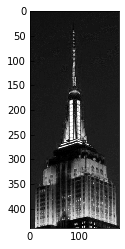

In [6]:
pl.imshow(esbBWtop, cmap="gray")

In [7]:
esbs = np.sort(glob.glob("esb/*"))
esbs

array(['esb/Empire-State-Building-Farben-1 (dragged).tiff',
       'esb/Empire-State-Building-Farben-2 (dragged).tiff',
       'esb/Empire-State-Building-Farben-3 (dragged).tiff',
       'esb/Empire-State-Building-Farben-4 (dragged).tiff',
       'esb/Empire-State-Building-Farben-5 (dragged).tiff',
       'esb/Empire-State-Building-Farben-6 (dragged).tiff'], 
      dtype='|S49')

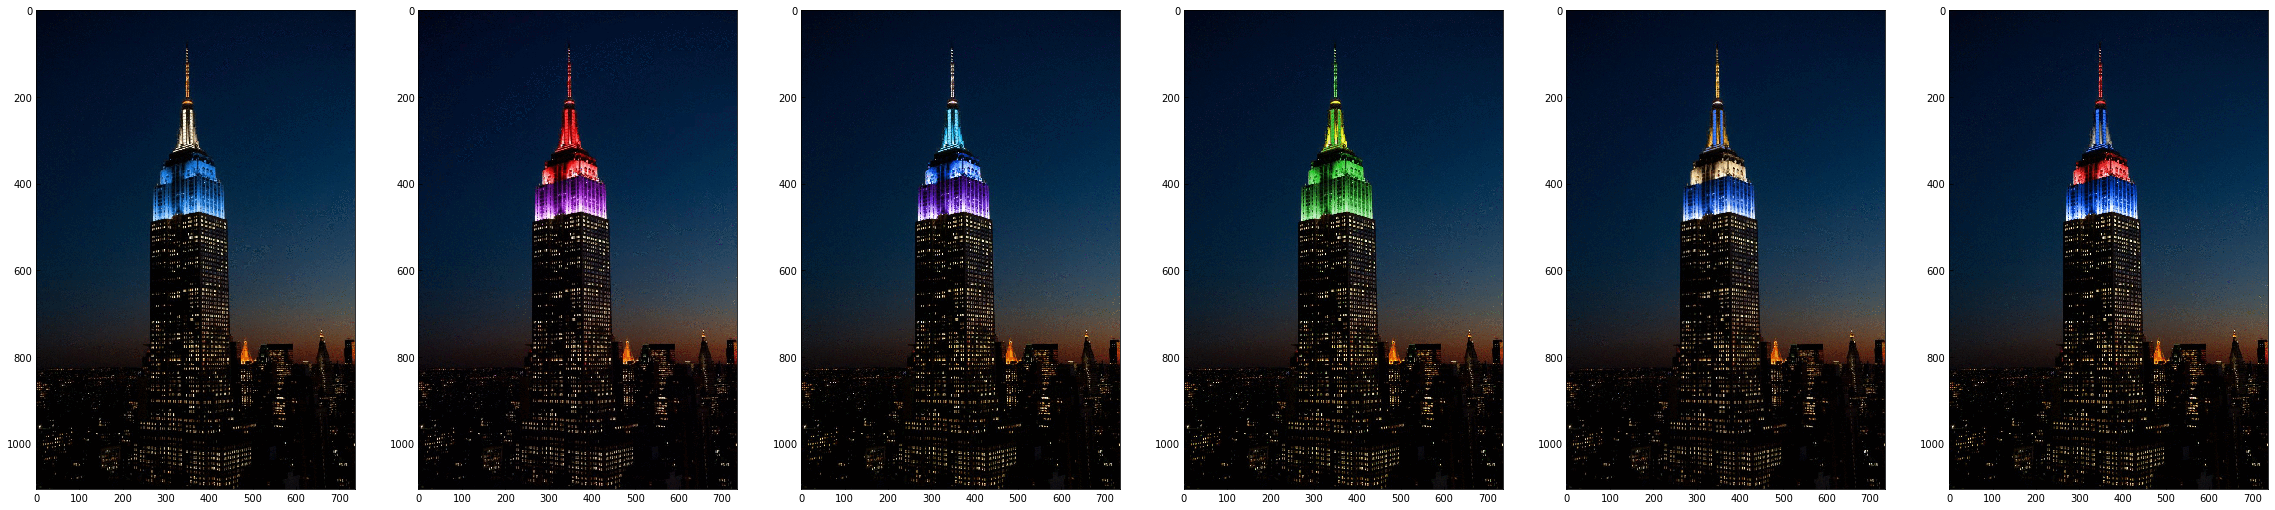

In [8]:
f, axs = pl.subplots(1,6, figsize=(40,10))
for i in range(len(esbs)):
    axs[i].imshow(nd.imread(esbs[i]))

# extract colors

predominant color:
blue


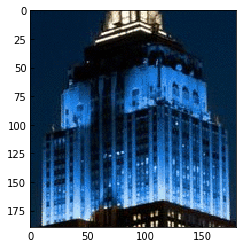

predominant color:
blue


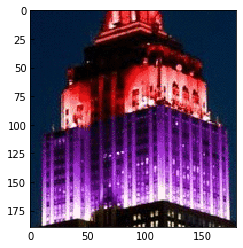

predominant color:
blue


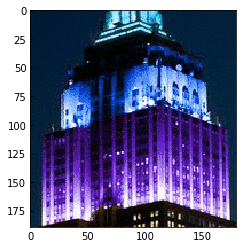

predominant color:
green


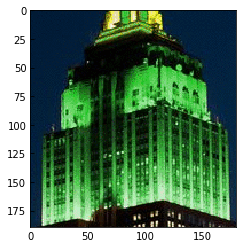

predominant color:
blue


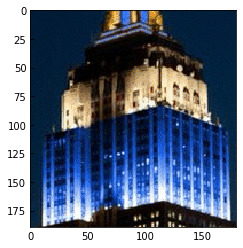

predominant color:
blue


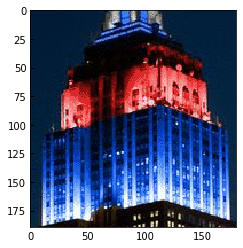

In [9]:
esbtop = np.zeros((6, 190, 180, 3), uint8)
for i, esbim in enumerate(esbs):
    esbtop[i] = nd.imread(esbim)[300:490, 260:440, :-1]
    r =  esbtop[i][:,:,0].astype(float).mean() 
    g =  esbtop[i][:,:,1].astype(float).mean() 
    b =  esbtop[i][:,:,2].astype(float).mean() 
    print("predominant color:")
    if r > g and r > b :
        print("red")
    if g > r and g > b :
        print("green")
    if b > g and b > r :
        print("blue")
    pl.imshow(esbtop[i])
    pl.show()
    
    

<Container object of 3 artists>

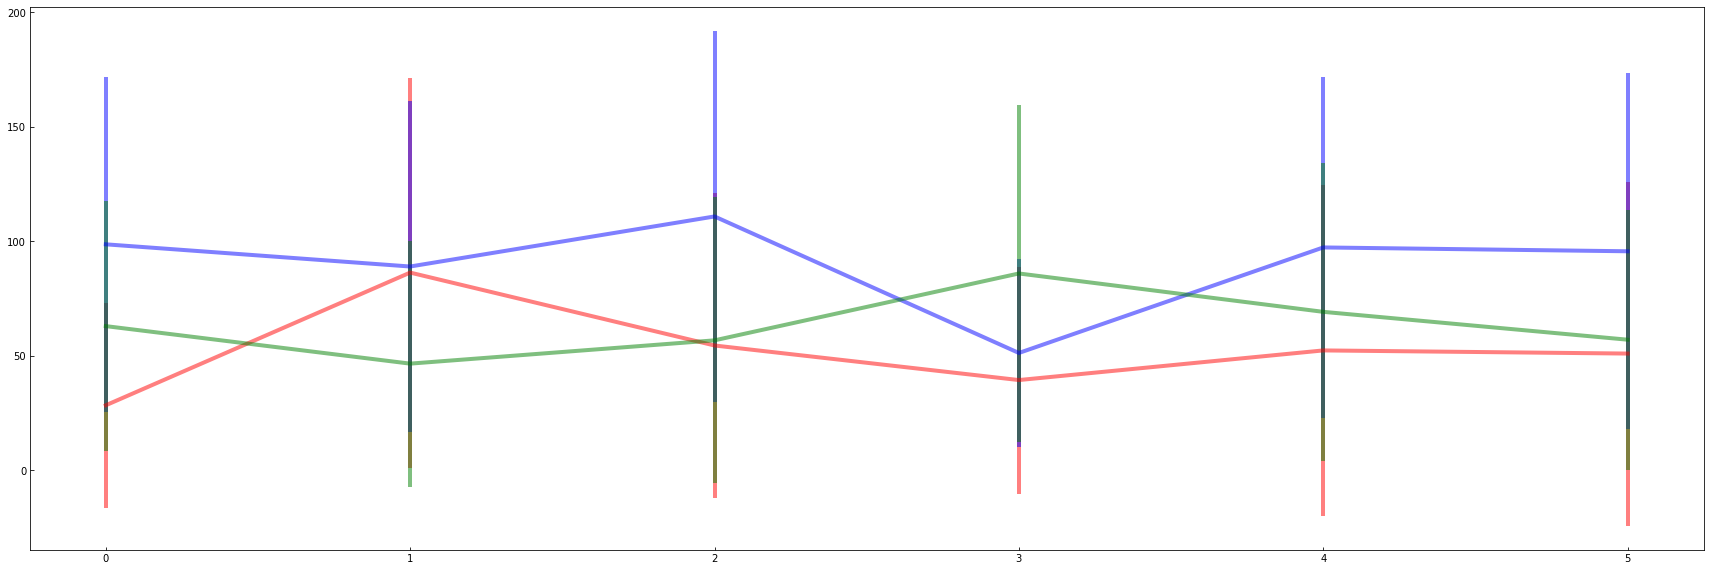

In [10]:
rs, bs, gs = np.zeros((len(esbtop), 2)), np.zeros((len(esbtop), 2)), np.zeros((len(esbtop), 2))
pl.figure(figsize=(30,10))

for i, esbim in enumerate(esbs):
    esbtop[i] = nd.imread(esbim)[300:490, 260:440, :-1]
    rs[i] =  esbtop[i][:,:,0].astype(float).mean(), esbtop[i][:,:,0].astype(float).std() 
    gs[i] =  esbtop[i][:,:,1].astype(float).mean(), esbtop[i][:,:,1].astype(float).std() 
    bs[i] =  esbtop[i][:,:,2].astype(float).mean(), esbtop[i][:,:,2].astype(float).std()
pl.errorbar(range(len(esbtop)), rs[:,0], yerr=rs[:,1], c="r", alpha=0.5, lw=4)
pl.errorbar(range(len(esbtop)), bs[:,0], yerr=bs[:,1], c="b", alpha=0.5, lw=4)
pl.errorbar(range(len(esbtop)), gs[:,0], yerr=gs[:,1], c="g", alpha=0.5, lw=4)
 

predominant color:
blue


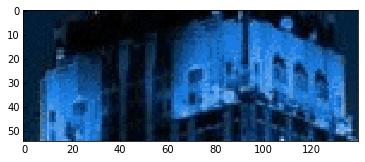

predominant color:
red


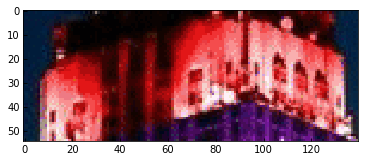

predominant color:
blue


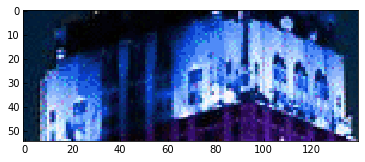

predominant color:
green


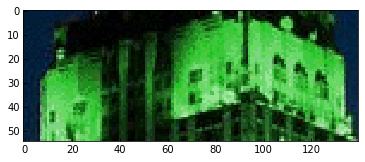

predominant color:
red


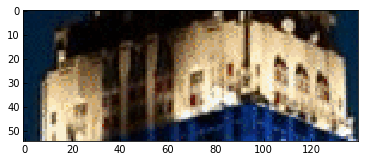

predominant color:
red


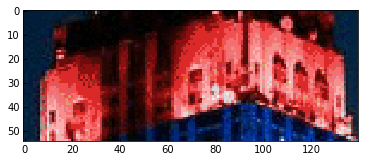

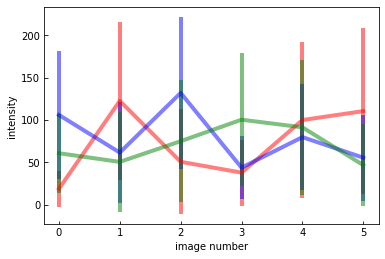

In [11]:
esbtop = np.zeros((6, 55, 140, 3), uint8)
for i, esbim in enumerate(esbs):
    esbtop[i] = nd.imread(esbim)[345:400, 280:420, :-1]
    pl.imshow(esbtop[i])
    
    rs[i] =  esbtop[i][:,:,0].astype(float).mean(), esbtop[i][:,:,0].astype(float).std() 
    gs[i] =  esbtop[i][:,:,1].astype(float).mean(), esbtop[i][:,:,1].astype(float).std() 
    bs[i] =  esbtop[i][:,:,2].astype(float).mean(), esbtop[i][:,:,2].astype(float).std()
    print("predominant color:")
    if rs[i][0] > gs[i][0] and rs[i][0] > bs[i][0] :
        print("red")
    if gs[i][0] > rs[i][0] and gs[i][0] > bs[i][0] :
        print("green")
    if bs[i][0] > gs[i][0] and bs[i][0] > rs[i][0] :
        print("blue")
    
    pl.show()

pl.errorbar(range(len(esbtop)), rs[:,0], yerr=rs[:,1], c="r", alpha=0.5, lw=4)
pl.errorbar(range(len(esbtop)), bs[:,0], yerr=bs[:,1], c="b", alpha=0.5, lw=4)
pl.errorbar(range(len(esbtop)), gs[:,0], yerr=gs[:,1], c="g", alpha=0.5, lw=4)
pl.ylabel("flux intensity")  
pl.ylabel("intensity")  
pl.xlabel("image number")

# Find windows

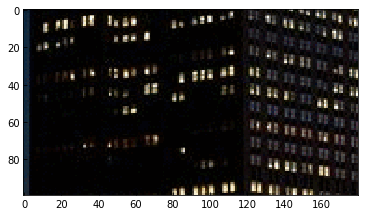

In [12]:
lights = nd.imread(esbim)[550:650, 260:440, :-1]
pl.imshow(lights)

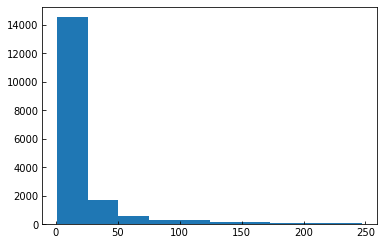

In [13]:
pl.hist(lights.astype(float).mean(-1).flatten());

In [14]:
lightsmask = lights.astype(float).mean(-1) > 50

number of windows: 211


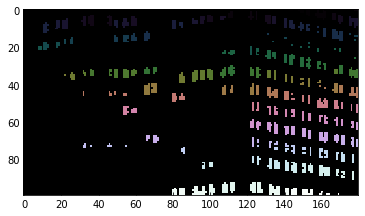

In [15]:
label_im, nb_labels = nd.label(lightsmask)
print("number of windows:", nb_labels) # how many regions?
pl.imshow(label_im, cmap='cubehelix')      


In [16]:
window27 = label_im == 27

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 99 but corresponding boolean dimension is 100
  if __name__ == '__main__':


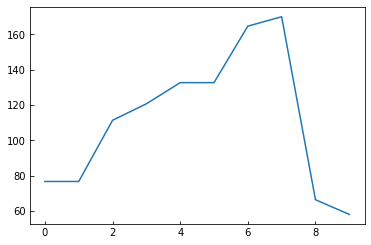

In [18]:
pl.plot(lights[:-1].astype(float).mean(-1)[window27])

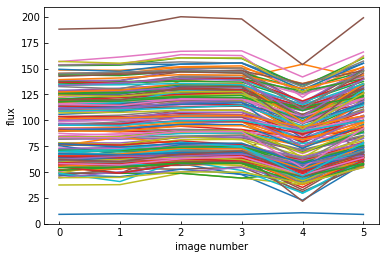

In [19]:
lcvs =  np.zeros((nb_labels, len(esbtop)))

for w in range(nb_labels):
    lcvs[w] = np.array([nd.imread(esbim)[550:650, 260:440, :-1].astype(float).mean(-1)[label_im == w].mean() for  esbim in esbs])
    pl.plot(range(6), lcvs[w])
pl.xlabel("image number")
pl.ylabel("flux")

In [20]:
# there is a lot of vatiation that is seen in all lightcurves. 
# (e.g. image number 5 (the fourth) has overall less flux than the other images)
# what if I want to isolate windows that have a particular behavior compared to the overall trends?
lcvs.mean(axis=0)

array([ 89.69259806,  90.10409627,  94.8570517 ,  94.74939692,
        75.03626173,  95.37624987])

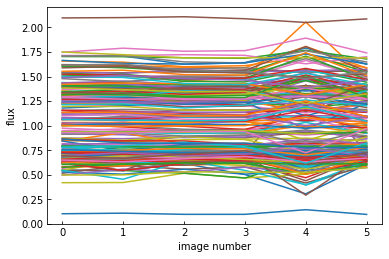

In [21]:
lcvsmean = lcvs.mean(axis=0)
# de-trending: removing collective behavior 
for w in range(nb_labels):
    pl.plot(range(6), lcvs[w] / lcvsmean )
pl.xlabel("image number")
pl.ylabel("flux")

In [22]:
# now I see that image 4 (5th image) also has more variance than the other ones! 

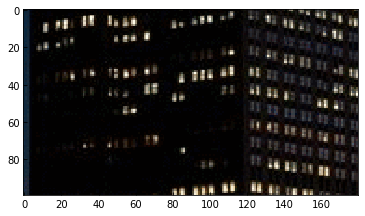

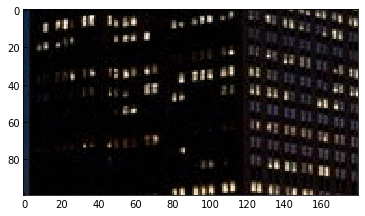

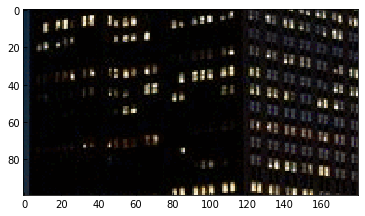

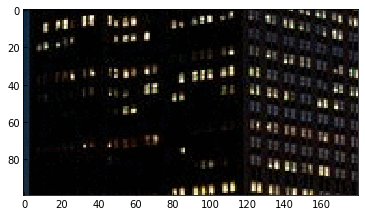

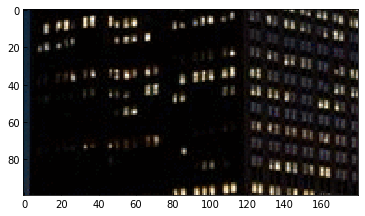

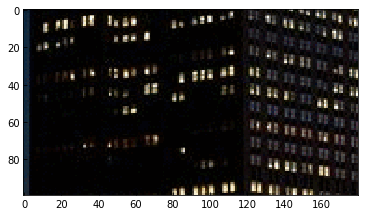

In [23]:
for esbim in esbs:
    pl.imshow(nd.imread(esbim)[550:650, 260:440, :-1])
    pl.show()

## inspect 1 window

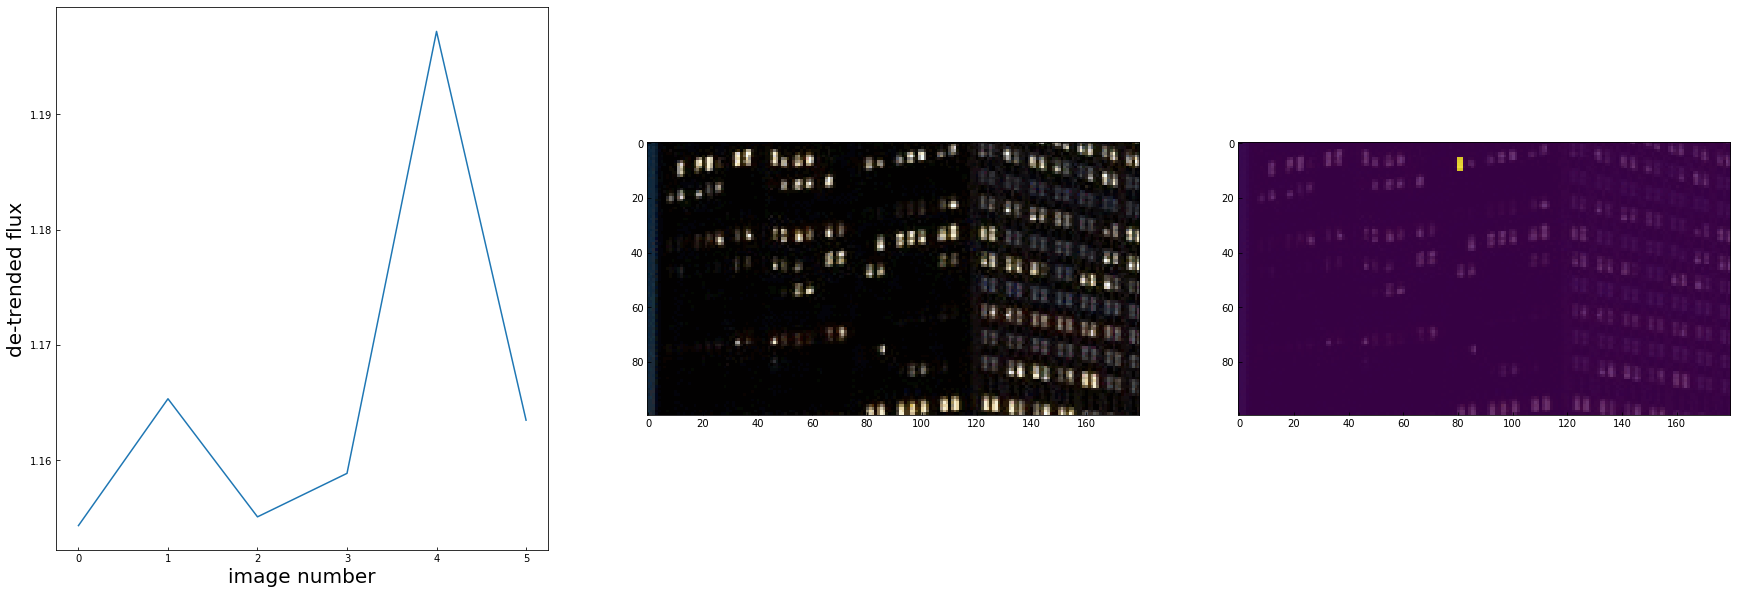

In [27]:
f = pl.figure(figsize=(30, 10))

ax1 = f.add_subplot(131)
ax1.plot(lcvs[27] / lcvsmean)
pl.xlabel("image number", fontsize=20)
pl.ylabel("de-trended flux", fontsize=20)

ax2 = f.add_subplot(132)
ax2.imshow(nd.imread(esbim)[550:650, 260:440, :-1])#lcvs[7] / lcvsmean)

ax2 = f.add_subplot(133)
ax2.imshow(nd.imread(esbim)[550:650, 260:440, :-1])#lcvs[7] / lcvsmean)
ax2.imshow(window27, alpha=0.8)#lcvs[7] / lcvsmean)
